In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from IPython.display import display, Markdown
az.style.use('arviz-darkgrid')
np.random.seed(44)


In [2]:
import seaborn as sns
sns.set_theme()
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    "figure.figsize": [12.0, 5.0],
    'figure.facecolor': '#fffff8',
    'axes.facecolor': '#fffff8',
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0, 
})

# Linear regression


Giorgio Corani <br/>
*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Outline
* Traditional linear regression
* Probabilistic linear regression
* Robust linear regression
* Hierarchical regression
* Polinomial regression
* Interactions
* Varying variance

# Credits 

* The discussion of traditional linear regression is based on Sec 5.1 ( <a href="https://otexts.com/fpp2/regression-intro.html">https://otexts.com/fpp2/regression-intro.html</a>) of the online book <a href="https://otexts.com/fpp2/"> Forecasting: Principles and Practice </a> by Rob J Hyndman and George Athanasopoulos

# Linear regression

* Suppose we have a variable $x$ and we want to predict $y$. 
* We have paired observations $\{(x_1,y_1), (x_2,y_2), (x_3,y_3),\dots (x_n,y_n)\}$. 
*  $y$ is the *dependent* (or  *response*) variable
*  $x$  is the *independent*  (or *explanatory*  or *feature*)  variable



# Simple linear regression

$$y_i = \alpha + x_i \beta  + \epsilon_i$$


* $y_i$ and $x_i$ denote the observation of $x$ and $y$ in the $i$-th row of data.

* $\beta$ (*slope*): average predicted change in $y$  for a unit change in  $x$. 

* $\alpha$ (*intercept*):  predicted value of $y$ for $x$ = 0.

* $\epsilon_i$ is a noise affecting the $i$-th observation, so that  the observations do not lie on the straight line but are scattered around it. 

# Simple linear regression

<img src='img/linreg.png' width=600 align="center" > 

$$y_i = \alpha + x_i \beta  + \epsilon_i$$


*   The noise term $\epsilon_i$ implies a deviation from the  linear model. It captures anything that may affect $y_i$ other than $x_i$.

# Multiple linear regression

* Linear regression with $k$ explanatory variables:

\begin{align}
 y_i= \alpha+ β_1 x_{i,1} t + β_2 x_{i,2}  +⋯+\beta_{i,k} +ε_i,
\end{align}

* $x_{i,j}$: observation of the $j$-th explanatory variable in the $i$-th row of data

* The coefficients $\beta_1,…,\beta_k$ measure the effect of each predictor after taking into account the effects of all the other predictors in the model; thus, they measure the *marginal effects* of the  explanatory variables.

# Assumptions about the errors $\epsilon$

We assume the error $\epsilon$ :

 *  to have mean zero; otherwise the prediction will be systematically biased;
*  to be  normally distributed with a constant variance $\sigma^2_{\epsilon}$ in order to compute the prediction intervals;
*   to be independent from the value of $y$.

Thus, we assume $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$.

# Least square estimation

* We need to estimate from data the coefficients $\alpha, \beta_0, ... \beta_k$.

* We do so  by minimising the sum of the squared errors: we choose the values of the coefficients that minimise:

\begin{align}
    \sum_{i=1}^{n} \epsilon_i^2 = \sum_{i=1}^{n}  \left(y_i− \alpha− \beta_1 x_{1,i} − β_2 x_{2,i} −⋯−β_k x_{k,t} \right)^2.
\end{align}

* The *least squares estimation*  minimizes  for the sum of squared errors. 

*  The estimated coefficients are referred to as  $\hat{\alpha}, \hat{\beta_1},…,\hat{\beta_k}$.


# Example (from sklearn documentation)

In [5]:
print(len(x_train))
print(len(x_test))


242
200


Coefficients: 
 [927.11987755]
Intercept: 
 151.44635702005291


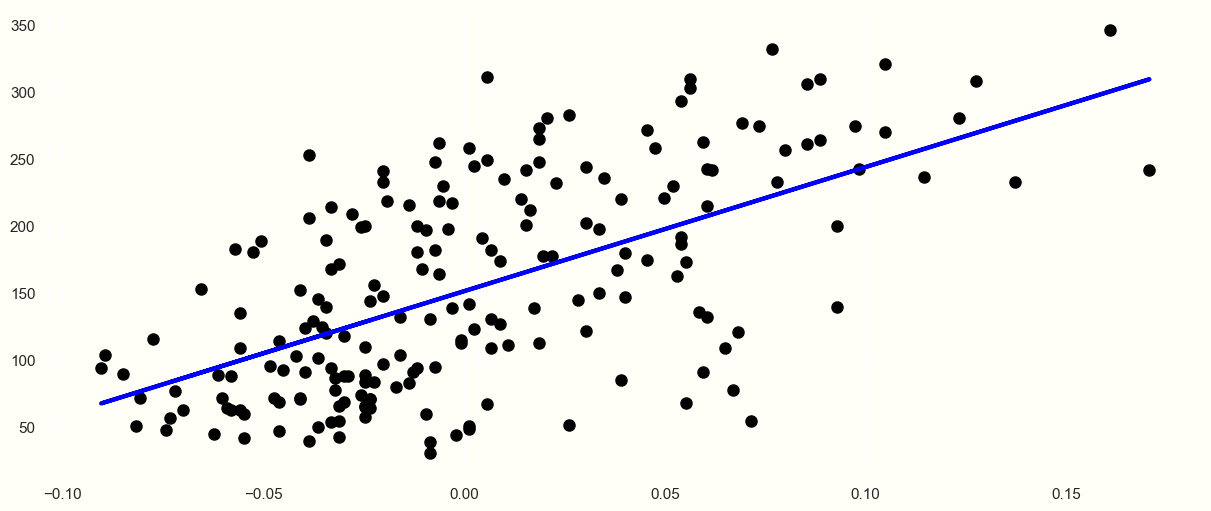

In [6]:
from sklearn import datasets, linear_model
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets (the last 20 observations)
x_train = diabetes_X[:-200]
x_test = diabetes_X[-200:]
y_train = diabetes_y[:-200]
y_test = diabetes_y[-200:]


#print(len(x_train)) 242
#print(len(x_test)) 200

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# print the coefficients
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)


plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3);

# Fitted values

* Predictions of $y$ can be obtained by: using the estimated coefficients in the regression equation and  setting the error term to zero:
\begin{align}
 \hat{y}_i= \hat{\alpha} + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i} +⋯+\hat{\beta}_k x_{k,i}
 \end{align}
 
* The prediction computed on the training set are called *fitted values*.


# Residuals

* The differences between actual values and prediction on the  training set are called  *residuals*.
The $i$-th residual $r_i$ is:

\begin{align}
e_i  & = y_i - \hat{y}_i  \\
& = y_i - (\alpha + \beta x_i)
\end{align}

* In order to compute prediction intervals, we shall at least check that the residuals are normally distributed and which is their standard deviations

* We check normality by a simple visual inspection; more sophisticated methods could be adopted.

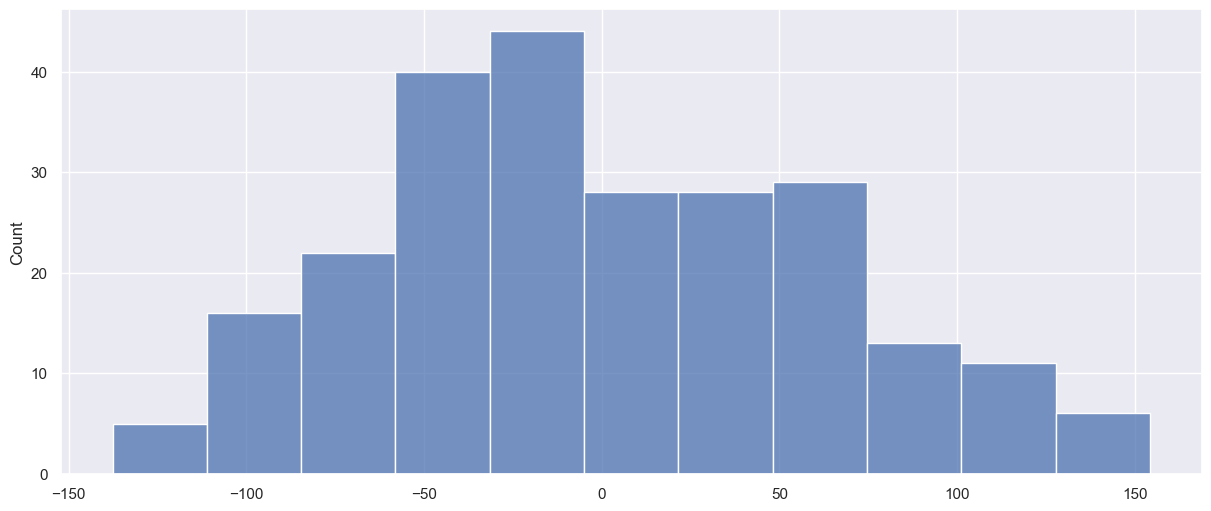

In [7]:
# Make predictions on the training set
fitted_values = regr.predict(x_train)

# residuals
residuals =  y_train - fitted_values
sns.set_theme()
sns.histplot(residuals);

# Standard deviation of the residuals

*  The standard deviation of the residuals is related to the size of the average error that the model produces. 
*  We use it as an estimate of  ${\sigma_{\epsilon}}$ when computing the prediction intervals.
* We can compare it to the  mean of $y$ to gain some perspective on the accuracy of the model.
* We use $\hat{\sigma_{\epsilon}}$ as:
\begin{align}
\hat{\sigma_{\epsilon}} = \sqrt{
\frac{1}
{n-k-1}
\sum_{i=1}^{n} e^2_i
}
\end{align}



# Prediction intervals

*  The standard deviation of the residuals is related to the size of the average error that the model produces. 
*  We use it as an estimate of  ${\sigma_{\epsilon}}$ when computing the prediction intervals.
* We can compare it to the  mean of $y$ to gain some perspective on the accuracy of the model.
* We use $\hat{\sigma_{\epsilon}}$ as:
\begin{align}
\hat{\sigma_{\epsilon}} = \sqrt{
\frac{1}
{n-k-1}
\sum_{i=1}^{n} e^2_i
}
\end{align}



# Problema

* I prediction intervals variano con X, https://otexts.com/fpp2/regression-matrices.html#regression-matrices

# Least squares estimation
* Let us denote the parameters as $\theta = [\alpha, \beta]$.

* We look for the value of the parameters which minimizes $\sum_i r_i^2$, i.e. the sum of the *squared residuals*.

* This is called *least-squares* fitting, which is an optimization problem.

* The returned optimal estimate is denoted by $\hat{\theta} = [\hat{\alpha},\hat{\beta}]$

\begin{align}
\hat{\theta} &  = \arg \min \sum_i r_i ^2 \\
& = \arg \min \sum_i (y_i - (\alpha + \beta x_i)) ^2
\end{align}


# Shortcoming of least squares fitting

* The prediction $\hat{y_i} = \alpha + \beta x_i$ does not account for our uncertainty about the estimate of the parameters.
* Even if we compute prediction interval, they do  not account for our uncertainty about the estimate of the parameters.
* The model is not robust to outliers, and removing outliers is done heuristically. 

# Probabilistic approach to linear regression



$$y \sim \mathcal{N}(\mu=\alpha + x \beta, \epsilon)$$

$y_i$ is a Gaussian distributed random variable with:
* mean $\alpha + x_i \beta$ 
* standard deviation $\sigma_{\epsilon}$.  

Hence a linear regression is an extension of a Gaussian model where instead of estimating the mean directly, we calculate it as a linear function of the predictor variables

# Priors

* Since we do not know the values of $\alpha$, $\beta$ and $\epsilon$, we have to assign them prior distributions. 

* If we were to use flat priors then the maximum posterior value (the mode of the posterior) would be the same as that found using maximum likelihood. 

* A possible choice  priors is to assign Gaussian priors to $\alpha$ and $\beta$, and half-normal prior to $\sigma_{\epsilon}$:
$$
\alpha \sim \mathcal{N}(\mu_\alpha, \sigma_\alpha) \\
\beta \sim \mathcal{N}(\mu_\beta, \sigma_\beta) \\
\epsilon \sim |{N}(0, \sigma_\epsilon)| 
$$


# Priors

* In general  we do not have a very clear idea about what the  value of the parameters. 

* We thus set  priors which are large compared to the scale of the data.

* Using standardized data is often useful for choosing slightly informative priors that work for a wide range of problems.

## BISOGNA STANDARDIZZARE DOPO PER FARE VEDERE COME RIMUOVERE L'AUTOCORRELAZIONE **


# Weakly informative priors

Intercept:
* $\mu_\alpha$=0
* $\sigma_\alpha$ = 10 $\sigma_y$ 

Slope
* $\mu_\beta$=0
* $\sigma_\beta$ = 10 $\sigma_y$ 

Noise
* $\sigma_\epsilon$ = 10 $\sigma_y$ 

* Sometimes you know about the problem and you can be more informative.


# Priors on the intercept

The estimated linear regression passed through $\bar{x}, \bar{y}$.

* If we standardized both $x$ and $y$ (so that they have mean 0 and standard deviation 1), the intercept is 0 by design.



# Weakly informative priors

Intercept:
* $\mu_\alpha$=0
* $\sigma_\alpha$ = 10 $\sigma_y$ 

Slope
* $\mu_\beta$=0
* $\sigma_\beta$ = 10 $\sigma_y$ 

Noise
* $\sigma_\epsilon$ = 10 $\sigma_y$ 

* Sometimes you know about the problem and you can be more informative.

# Preparing the data..

In [8]:
x_train_std = (x_train - x_train.mean()) /  x_train.std()
y_train_std = (y_train - y_train.mean()) /  y_train.std()

In [9]:
with pm.Model() as reg_model:
    #priors on coefficients
    alpha = pm.Normal ('alpha', mu=0, sd=10)
    beta   = pm.Normal ('beta',   mu=0, sd=10)
    #prior on noise variance
    sigma_eps = pm.HalfNormal ('sigma_eps', sd=10)
    
    # mu  is expressed in the model as a deterministic variable.
    # PyMC3 saves  deterministic variable in the trace.
    mu = pm.Deterministic('mu', alpha + beta * x_train)
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=sigma_eps, observed=y_train)
    
    trace_g = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 148 seconds.
The acceptance probability does not match the target. It is 0.9220369884160653, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9726470750125622, but should be close to 0.8. Try to increase the number of tuning steps.


* Some warnings are returned.
* To explore the results of our inference, we are  generate a trace plot, omitting the deterministic variable. 
* We  do so by passing the names of the variables we want to include in the plot, using  the 'var_names' argument.

In [12]:
az.summary(trace_g, var_names=['alpha', 'beta', 'sigma_eps'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,149.077,0.319,148.495,149.668,0.005,0.003,4240.0,2814.0,1.0
beta,-0.041,5.828,-10.602,10.863,0.087,0.097,4504.0,3000.0,1.0
sigma_eps,75.141,0.225,74.741,75.580,0.003,0.002,4458.0,3028.0,1.0


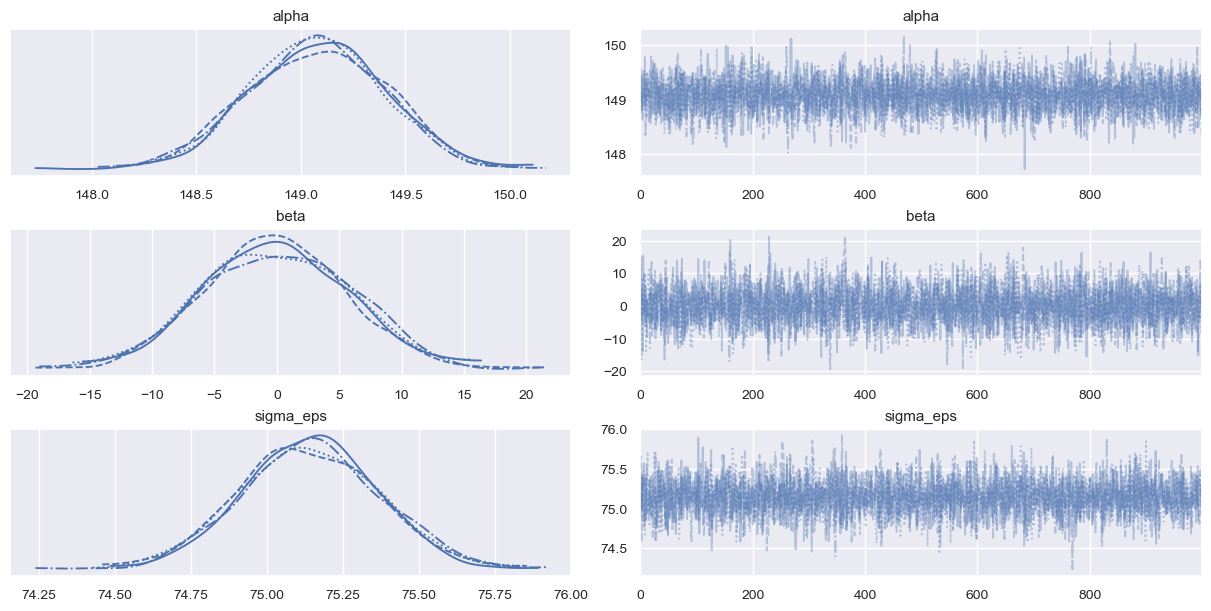

In [13]:
az.plot_trace(trace_g, var_names=['alpha', 'beta', 'sigma_eps']);

/Users/giorgio/opt/anaconda3/envs/r-reticulate/lib/python3.8/site-packages/arviz/plots/pairplot.py:186: UserWarning: plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs
  warnings.warn(


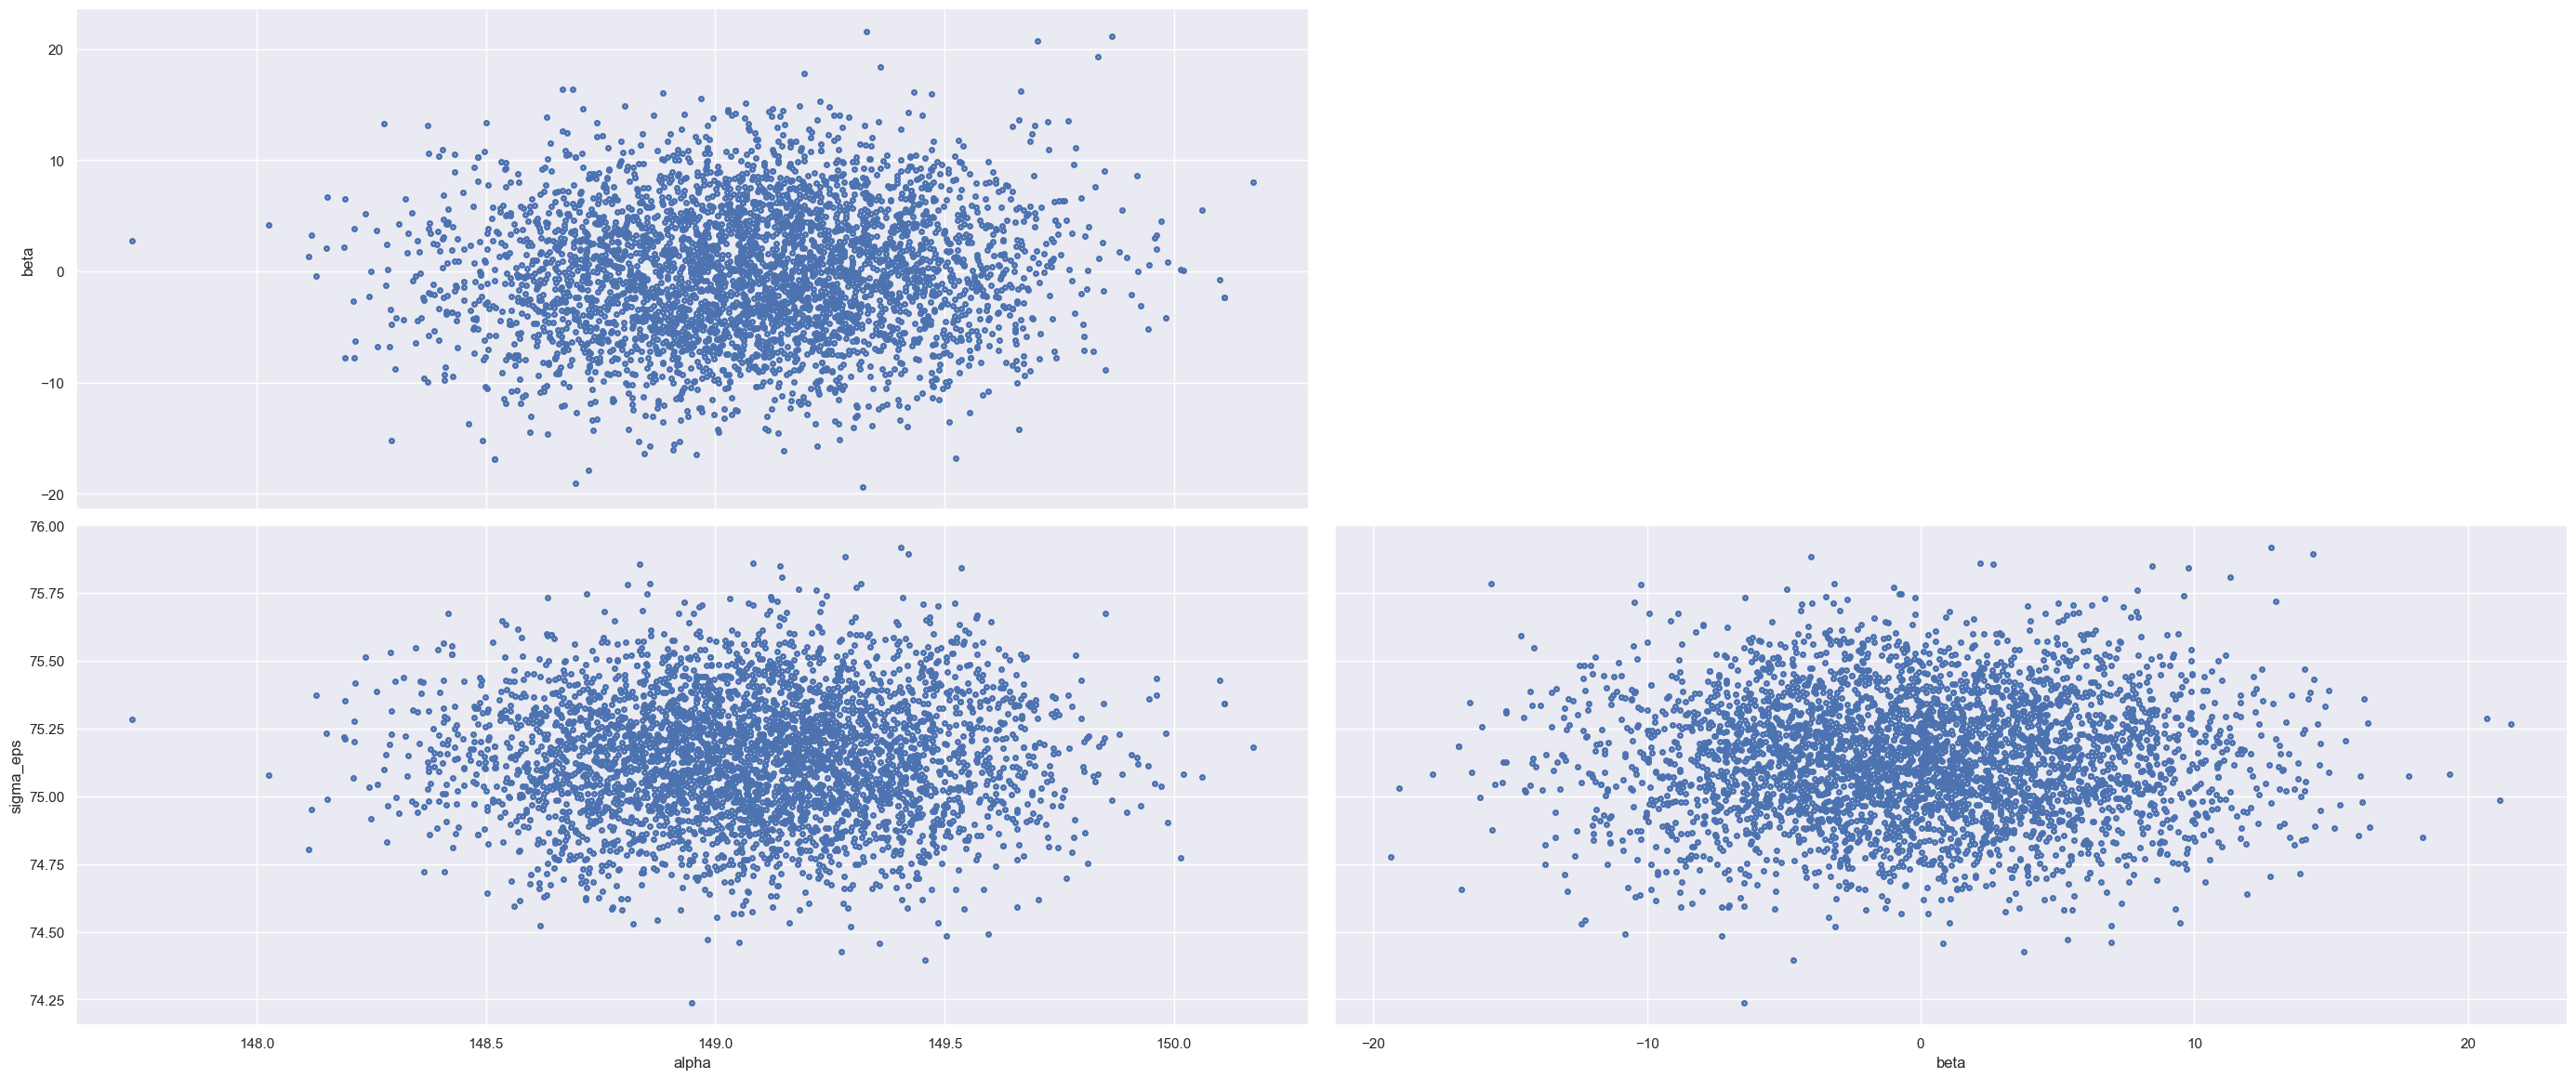

In [15]:
az.plot_pair(trace_g, var_names=['alpha', 'beta', 'sigma_eps'], plot_kwargs={'alpha': 0.1});

## Modelos lineales y autocorrelación

En un modelo lineal los parámetros $\alpha$ y $\beta$ están correlacionados.  Esto se puede ver en la siguiente figura:

In [ ]:
az.plot_pair(trace_g, var_names=['α', 'β', 'ϵ'], plot_kwargs={'alpha':0.1});

Esta correlación es una consecuencia directa de nuestras suposiciones. En general al hacer una regresión lineal Bayesiana las lineas que ajustan los datos pasan aproximadamente por la media de $x$ y la media de $y$, además el aumento en la pendiente significa la disminución de la ordenada al origen y viceversa. Esto provoca que el posterior para $\alpha$ y $\beta$ sea _un espacio muy diagonal_. Esto puede ser problemático para métodos como Metropolis-Hastings y, en menor medida para NUTS.

Un método simple para eliminar la correlación entre $\alpha$ y $\beta$ consiste en centrar la variable $x$, para esto calculamos su media y se la restamos a cada valor, obteniendo así $x'$. Como resultado la media de $x'$ será 0, si usamos $x'$ como variable dependiente $\alpha$ deberá estar alrededor de 0 y además las lineas que sean solución al problema _pivotearán_ alrededor de 0 por lo que los cambios de $\beta$ tendrán poco efecto en los valores de $\alpha$ esto provoca que el posterior para $\alpha$ y $\beta$ sea _más circular_ y menos correlacionado. Esto lo pueden comprobar ustedes mismos si vuelven a correr el modelo anterior, pero esta vez centrando los datos.

Centrar datos no es solo un truco computacional, también puede ser un truco estadístico que ayuda a interpretar los resultados. $\alpha$ es el valor de $y_i $ cuando $x_i = 0$. Para muchos problemas, esta interpretación no tiene ningún sentido. Por ejemplo, para cantidades tales como la altura o el peso, los valores de cero no tienen sentido. En cambio, al centrar las variables, $\alpha$ se convierte en el valor de $y_i$ para el valor medio de $x$. Para algunos problemas, puede ser útil estimar $\alpha$ precisamente porque no es factible medir experimentalmente el valor de $x_i = 0$ y, por lo tanto, $\alpha$ puede proporcionarnos información valiosa, pero las extrapolaciones tienen sus advertencias, así que ¡tene cuidado cuando haces esto!


Es posible que deseemos informar los parámetros estimados en términos de los datos centrados o en términos de datos _descentrados_, la decisión dependerá del problema y de la audiencia. Si necesitamos informar los parámetros como si hubiesen sido determinados en la escala original, podemos hacer lo siguiente para devolverlos a esa escala:

$$\alpha = \alpha' - \beta' \bar x \tag{3.5}$$

Esta corrección es el resultado del siguiente razonamiento algebraico:

$$
y =\alpha' + \beta'x' + \epsilon \\
y =\alpha' + \beta'(x - \bar x) + \epsilon \\
y =\alpha' - \beta' \bar x + \beta'  x + \epsilon \\ \tag{3.6}
$$

Luego se deduce que la ecuación 3.5 es verdadera y también:

$$\beta = \beta' \tag{3.7}$$


Otra transformación que puede ser útil es estandarizar los datos. Esta transformación es una práctica común para los modelos de regresión lineal tanto en estadística y _machine learning_, ya que muchos algoritmos se comportan mejor cuando los datos están estandarizados. Esta transformación se logra al centrar los datos y dividirlos por la desviación estándar. Matemáticamente tenemos:

$$
x' = \frac{x - \bar x}{x_{sd}} \\
y' = \frac{y - \bar y}{y_{sd}} \tag{3.8} 
$$


Una ventaja de la estandarización de los datos es que siempre podemos usar los mismos priors débilmente informativos, sin tener que pensar en la escala de los datos. Para datos estandarizados, la intersección siempre será alrededor de 0 y la pendiente estará restringida al intervalo [-1, 1]. Estandarizar los datos nos permite hablar en términos de Z-score, es decir, en unidades de desviaciones estándar. Si alguien dice que el valor de un parámetro es -1.3 unidades de Z-score, sabemos automáticamente que el valor en cuestión es 1.3 desviaciones estándar por debajo del valor de la media (aún cuando no sepamos cual es el valor de la media). Un cambio en una unidad Z-score es un cambio en una desviación estándar cualquiera sea la escala original de los datos. Los Z-zcore también son muy útiles cuando se trabaja con muchas variables; ya que tener todas las variables en una misma escala puede simplificar la interpretación de los datos.

## Interpretando y visualizando el posterior


Como ya hemos visto, podemos explorar el posterior usando funciones de ArviZ como `plot_trace` y `summary`, o podemos usar nuestras propias funciones. Para una regresión lineal, podría ser útil dibujar la línea promedio que ajusta los datos junto con los valores promedio de $\alpha$ y $\beta$. Para reflejar la incertidumbre contenida en la distribución _a posteriori_, podemos usar líneas semitransparentes muestreadas de esta distribución:

In [ ]:
plt.plot(x, y, 'C0.');

alpha_m = trace_g['α'].mean()
beta_m = trace_g['β'].mean()

idx = range(0, len(trace_g['α']), 10)
print(x.shape, x[:,np.newaxis].shape, trace_g['α'][idx].shape)
plt.plot(x, trace_g['α'][idx] + trace_g['β'][idx] *  x[:,np.newaxis], c='gray', alpha=0.5);

plt.plot(x, alpha_m + beta_m * x, c='k',
         label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))

plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.legend();

En la figura anterior se puede ver que la incertidumbre es menor en el medio, aunque no se reduce a un solo punto, es decir, la distribución a posteriori es compatible con las líneas que no pasan exactamente por la media de los datos, como ya hemos mencionado.

Una alternativa a muestrear lineas de la distribución a posteriori es dibujar una banda semitransparente que represente un intervalo HPD de $\mu$. Al haber definido la variable $\mu$ como determinista en el modelo, podemos hacer esto de forma sencilla:

In [ ]:
plt.plot(x, alpha_m + beta_m * x, c='k',
         label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))

az.plot_hpd(x, trace_g['μ'], color='k')

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0);

Una tercera opción es representar el HPD de los datos predichos (en vez de algún parámetro). En la siguiente figura sea usa un gris más oscuro para el HPD 50 y un gris más claro para el HPD 96. Para poder hacer el siguiente gráfico necesitamos, primero, obtener las muestras predictivas posteriores. Lo cual es fácil usando PyMC3 con la función `sample_ppc`:


In [ ]:
ppc = pm.sample_ppc(trace_g, samples=2000, model=model_g)

Y ahora si la figura

In [ ]:
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))

az.plot_hpd(x, ppc['y_pred'], color='gray')
az.plot_hpd(x, ppc['y_pred'], credible_interval=0.5, color='gray')

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0);

## Regresión lineal robusta


Asumir que los datos siguen una distribución gaussiana es perfectamente razonable en muchas situaciones. Al asumir Gaussianidad, no necesariamente estamos aceptando que los datos son gaussianos; en cambio, estamos diciendo que es una aproximación razonable para un problema determinado. Como vimos en el capítulo anterior, a veces esta suposición gaussiana falla, por ejemplo, en presencia de valores aberrantes. Aprendimos que el uso de la distribución t de Student es una forma de tratar de manera efectiva con valores atípicos y obtener una inferencia más robusta. La misma idea se puede aplicar a la regresión lineal y para ejemplificarla vamos a utilizar un conjunto de datos muy simple: el tercer grupo de datos del [cuarteto de Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [ ]:
ans = pd.read_csv('datos/anscombe.csv')
x_3 = ans[ans.group == 'III']['x'].values
y_3 = ans[ans.group == 'III']['y'].values
x_3 = x_3 - x_3.mean()

Y ahora veamos cómo luce este pequeño conjunto de datos:

In [ ]:
_, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(x_3, y_3, 'C0o')
ax[0].set_xlabel('x', fontsize=16)
ax[0].set_ylabel('y', rotation=0, fontsize=16)
az.plot_kde(y_3, ax=ax[1], rug=True)
ax[1].set_xlabel('y', fontsize=16)
plt.tight_layout();

Ahora vamos a reescribir el `modelo_g` esta vez usando una distribución t de Student en lugar de una Gaussiana. Este cambio también introduce la necesidad de especificar el valor de $\nu$, el parámetro de normalidad. Si no recuerdas la función de este parámetro, consultá el capítulo anterior antes de continuar.

En el siguiente modelo estamos usando una distribución exponencial _desplazada_, para evitar valores de $\nu$ cercanos a cero. La exponencial _no desplazada_ pone demasiado peso en valores cercanos a cero y esto puede traer algunos problemas. En el casos del tercer conjunto de datos de Anscombe _lo problemático_ deriva de que es posible ajustar una recta de forma perfecta (si obviamos el dato aberrante). Como regla general los _priors_ usados en este curso suelen ser buenos valores por defecto, pero nada más que eso. Otra distribución a _priori_ comunmente usada para $\nu$ es `gamma(2, 0.1)` o `gamma(mu=20, sd=15)`.

In [ ]:
with pm.Model() as model_t:
    α = pm.Normal('α', mu=y_3.mean(), sd=1)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1)
    
    y_pred = pm.StudentT('y_pred', mu=α + β * x_3,
                         sd=ϵ, nu=ν, observed=y_3)
    
    trace_t = pm.sample(2000, tune=1000)

In [ ]:
var_names = ['α', 'β', 'ϵ', 'ν']
az.plot_trace(trace_t, var_names=var_names);

En la siguiente gráfica podemos ver el ajuste robusto, según `model_t`, y el ajuste no robusto de acuerdo con la función `linregress` de SciPy (esta función realiza una regresión por mínimos cuadrados). Como ejercicio, puede intentar agregar a esta gráfica la mejor línea obtenida usando `model_g`.

In [ ]:
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]

plt.plot(x_3, (alpha_c + beta_c * x_3), 'k', label='no-robusto', alpha=0.5)
plt.plot(x_3, y_3, 'C0o')
alpha_m = trace_t['α'].mean()
beta_m = trace_t['β'].mean()
plt.plot(x_3, alpha_m + beta_m * x_3, c='k', label='robusto')

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend(loc=2, fontsize=12)
plt.tight_layout();

La figura anterior se puede explicar porque una distribución de t, con sus colas más pesadas, es capaz de dar menos importancia a los puntos que están alejados del _grupo principal_ de datos. En cambio el ajuste no robusto _se esfuerza_ por incluir a todos los puntos. SI bien este es un conjunto muy particular de datos el mensaje es válido para datos más complejos y _reales_ 

Antes de continuar tómese un momento para contemplar los valores de los parámetros (estoy omitiendo los parámetros intermedios ya que no es de interés directo).

Antes de continuar tómemonos un momento para contemplar los valores de los parámetros según la distribución a posteriori.

In [ ]:
az.summary(trace_t, var_names)

Como pueden ver, los valores de $\alpha$, $\beta$ y $\epsilon$ practicamente no tienen variación (sd=0), incluso $\epsilon$ es prácticamente 0. Esto es totalmente razonable dado que estamos ajustando una línea recta a un perfecto conjunto alineado de puntos (si ignoramos el punto atípico).

## Regresión lineal jerárquica

En el capítulo anterior, aprendimos los rudimentos de los modelos jerárquicos. Este mismo concepto se puede aplicar a las regresiones lineales. Esto permite que los modelos realicen inferencias a nivel de subgrupo y a nivel global. Como ya vimos, esto se hace incluyendo hiperpriors.

Vamos a crear ocho grupos de datos relacionados, incluido uno con un solo dato

In [ ]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alfa_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alfa_real[idx] + beta_real[idx] * x_m  + eps_real

_, ax = plt.subplots(2, 4, figsize=(10,5), sharex=True, sharey=True)
ax = np.ravel(ax)
j, k = 0, N
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel('$x_{}$'.format(i))
    ax[i].set_ylabel('$y_{}$'.format(i), rotation=0, labelpad=15)
    ax[i].set_xlim(6, 15)
    ax[i].set_ylim(7, 17)
    j += N
    k += N
plt.tight_layout();

Vamos a centrar los datos antes de pasárselos al modelo.

In [ ]:
x_centered = x_m - x_m.mean()

In [ ]:
with pm.Model() as hierarchical_model:
    # hyper-priors
    α_μ_tmp = pm.Normal('α_μ_tmp', mu=0, sd=10)
    α_σ_tmp = pm.HalfNormal('α_σ_tmp', 10)
    β_μ = pm.Normal('β_μ', mu=0, sd=10)
    β_σ = pm.HalfNormal('β_σ', sd=10)

    # priors
    α_tmp = pm.Normal('α_tmp', mu=α_μ_tmp, sd=α_σ_tmp, shape=M)
    β = pm.Normal('β', mu=β_μ, sd=β_σ, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)

    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered, sd=ϵ, nu=ν, observed=y_m)

    α = pm.Deterministic('α', α_tmp - β * x_m.mean()) 

    trace_hm = pm.sample(1000, tune=1000)

In [ ]:
az.plot_forest(trace_hm, var_names=['α', 'β'], figsize=(8, 9), combined=True, r_hat=False, ess=False);

Dibujemos las líneas ajustadas, para cada uno de los ocho grupos.

In [ ]:
# add uncertainty
_, ax = plt.subplots(2, 4, figsize=(10,5), sharex=True, sharey=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel('$x_{}$'.format(i))
    ax[i].set_ylabel('$y_{}$'.format(i), labelpad=10, rotation=0)
    alfa_m = trace_hm['α'][:,i].mean()
    beta_m = trace_hm['β'][:,i].mean()
    ax[i].plot(x_range, alfa_m + beta_m * x_range, c='k',
             label='y = {:.2f} + {:.2f} * x'.format(alfa_m, beta_m))
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N
plt.tight_layout();

## Regresión polinomial


Ahora vamos a aprender cómo ajustar curvas usando una regresión lineal. Una manera de ajustar curvas usando un modelo de regresión lineal es construyendo un polinomio como este:

$$\mu = \beta_0 x^0 + \beta_1 x^1  \dots + \beta_m x^m \tag{3.12} $$

Si prestamos atención, podemos ver que este polinomio _esconde_  un modelo lineal simple. De hecho si hacemos que $\beta_n = 0$ para $n \gt 1$ obtendremos:

$$\mu = \beta_0 + \beta_1 x^1 \tag{3.13} $$

Que no es otra cosa que la ecuación de una recta. Una regresión polinomial sigue siendo una regresión lineal, ya que la linearidad del modelo está relacionada con la forma en que los parámetros entran en el modelo y no con las variables. Probemos construyendo una regresión polinomial de grado 2.

$$\mu = \beta_0 + \beta_1 x^1 + \beta_2 x^2 \tag{3.14} $$

El tercer término controla la curvatura de la relación como veremos a continuación.

Como un conjunto de datos, vamos a utilizar el segundo grupo del cuarteto de Anscombe.

In [ ]:
#ans = pd.read_csv('anscombe.csv')
x_2 = ans[ans.group == 'II']['x'].values
y_2 = ans[ans.group == 'II']['y'].values
x_2 = x_2 - x_2.mean()
#y_2 = y_2 - y_2.mean()

plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0);

In [ ]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    mu = α + β1 * x_2 + β2 * x_2**2
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_2)
    
    trace_poly = pm.sample(2000)

Once again, we are going to omit some checks and summaries and just plot the results, a nice curved line fitting the data almost with no errors. Take into account the minimalistic nature of the dataset.

In [ ]:
az.plot_trace(trace_poly);

In [ ]:
az.summary(trace_poly)

In [ ]:
x_p = np.linspace(-6, 6)
y_p = trace_poly['α'].mean() + trace_poly['β1'].mean() * x_p + trace_poly['β2'].mean() * x_p**2
plt.scatter(x_2, y_2)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x_p, y_p, c='C1');

### Interpretando los parámetros de una regresión polinomial

Uno de los problemas de la regresión polinómica es la interpretación de sus parámetros. Si queremos saber cómo cambia $y$ por unidad de cambio de $x$, no podemos simplemente verificar el valor de $\beta_1$, ya que $\beta_2$, y los coeficientes más altos (de estar presentes), tendrán un efecto en dicha cantidad. Entonces los coeficientes $\beta$ ya no son pendientes, son otra cosa. En el ejemplo anterior, $\beta_1$ es positivo y, por lo tanto, la curva comienza con una pendiente positiva, pero $\beta_2$ es negativo y, por lo tanto, después de un tiempo, la línea comienza a curvarse hacia abajo. Es como si tuviéramos dos fuerzas en juego, una empujando la línea hacia arriba y la otra hacia abajo. La interacción depende del valor de $x$. Cuando $x \lessapprox 11$ (en la escala original, o 2 en la escala centrada), la contribución dominante proviene de $\beta_1$, y cuando $x \gtrapprox 11$, entonces $\beta_2$ domina.

El problema de interpretar los parámetros no es solo un problema matemático, ya que esto se puede resolver mediante una inspección cuidadosa del modelo. El problema es que, en muchos casos, los parámetros no se traducen a cantidades que tengan sentido a la luz de nuestro conocimiento de dominio. Es decir no podemos relacionarlos con la tasa metabólica de una célula, la energía emitida por una galaxia o el número de habitaciones en una casa. Los parámetros terminan siendo simplemente perillas que podemos manipular para mejorar el ajuste pero sin un significado claro. En la práctica, la mayoría de la gente suele estar de acuerdo en que los polinomios de orden superior a dos o tres generalmente no son modelos muy útiles y se prefieren alternativas, quizá como los Procesos Gaussianos.


## Regresión lineal Multiple


Hasta ahora hemos estado trabajando con una variable dependiente y una variable independiente, sin embargo no es inusual tener varias variables independientes que queremos incluir en nuestro modelo. Algunos ejemplos podrían ser:

* Calidad percibida del vino (dependiente) y acidez, densidad, nivel de alcohol, azúcar residual y contenido de sulfatos (variables independientes)
* Calificaciones promedio de los estudiantes (dependientes) e ingresos familiares, distancia de la casa a la escuela y educación de la madre (variable categórica)

Podemos extender fácilmente el modelo de regresión lineal simple para tratar con más de una variable independiente. Llamamos a este modelo regresión lineal múltiple, que no debe confundirse con la regresión lineal multivariada, que corresponde con el caso de múltiples variables dependientes.

En una regresión lineal múltiple modelamos la media de la variable dependiente como:

$$\mu = \alpha + \beta_1 x_1 + \beta_2 x_2 \dots + \beta_m x_m \tag{3.15}$$

La expresión 3.15 se parece a una regresión polinomial (ecuación 3.12), pero no es exactamente lo mismo. Para la regresión lineal múltiple tenemos diferentes variables independientes en lugar de potencias sucesivas de la misma variable independiente. Desde el punto de vista de la regresión lineal múltiple, podemos decir que una regresión polinomial es como una regresión lineal múltiple pero con variables _inventadas_.

Usando la notación de álgebra lineal, podemos escribir una versión más corta:

$$\mu = \alpha + X \beta \tag{3.16}$$


Donde $\beta$ es un vector de coeficientes de longitud $m$, es decir, el número de variables dependientes. La variable $X$ es una matriz de tamaño $m \times n$ si $n$ es el número de observaciones y $m$ es el número de variables independientes. Si estás un poco oxidado con el álgebra lineal, puedes consultar el artículo de Wikipedia sobre el producto escalar entre dos vectores y su generalización a la multiplicación de matrices. Básicamente lo que necesitamos saber por el momento es que estamos usando una forma más corta y conveniente de escribir nuestro modelo:

$$X \beta = \sum_{i=1}^n \beta_ix_i = \beta_1 x_1 + \beta_2 x_2 \dots + \beta_m x_m \tag{3.17} $$

Usando el modelo de regresión lineal simple, encontramos una línea recta que (con suerte) explica nuestros datos. Bajo el modelo de regresión lineal múltiple, encontramos, en cambio, un hiperplano de dimensión $m$. Por lo tanto, el modelo de regresión lineal múltiple es esencialmente el mismo modelo de regresión lineal simple, la única diferencia es que ahora $\beta $ es un vector y $X$ es una matriz.

Vamos a definir nuestros datos:

In [ ]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

X = np.array([np.random.normal(i, j, N) for i,j in zip([10, 2], [1, 1.5])]).T
X_mean = X.mean(axis=0, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

A continuación vamos a definir una función que realiza tres gráficos de dispersión, dos entre cada variable independiente y la variable dependiente y el último entre ambas variables dependientes. Usaremos esta función para ayudarnos durante el resto del capítulo:

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 10))
    for idx, x_i in enumerate(x.T):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel('x_{}'.format(idx+1))
        plt.ylabel('y', rotation=0)

    plt.subplot(2, 2, idx+2)
    plt.scatter(x[:,0], x[:,1])
    plt.xlabel('x_{}'.format(idx))
    plt.ylabel('x_{}'.format(idx+1), rotation=0)

scatter_plot(X_centered, y);

Ahora sí vamos a definir, en PyMC3, un modelo adecuado para la regresión lineal múltiple. Como es de esperar el código luce muy similar al modelo de regresión lineal simple. Las principales diferencias son:

* La variable $\beta$ es Gaussiana con `shape = 2`, es decir una pendiente por cada variable independiente.
* La variable $\mu$ la definimos usando la función `pm.math.dot()`

Si estás familiarizado con NumPy, probablemente sepas que NumPy también incluye una función para multiplicar matrices `np.dot` y desde Python 3.5 (y desde NumPy 1.10) existe un nuevo operador para multiplicar matrices `@`. Sin embargo, aquí usamos la función de PyMC3, que no es más que un alias para el operador de multiplicación de matrices de Theano. Necesitamos hacer esto porque la variable $\beta$ es un tensor de Theano y no un array de NumPy.

In [ ]:
with pm.Model() as model_mlr:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α_tmp + pm.math.dot(X_centered, β)

    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β)) 

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_mlr = pm.sample(2000)

In [ ]:
var_names = ['α', 'β','ϵ']
az.plot_trace(trace_mlr, var_names);

In [ ]:
az.summary(trace_mlr, var_names)

Como podemos ver, nuestro modelo es capaz de recuperar los valores correctos (verificalo comparando contra los valores utilizados para generar los datos sintéticos).

En las siguientes secciones, nos centraremos en algunas precauciones que debemos tomar al analizar los resultados de un modelo de regresión múltiple, especialmente la interpretación de las pendientes. El principal mensaje de la siguiente sección es que en una regresión lineal múltiple, cada uno de los parámetros solo tiene sentido en el contexto del resto de los parámetros.

## Variables de confusión y variables redundantes

Imagina la siguiente situación. Tenemos una variable $z$ correlacionada con la variable pronosticadora $x$ y, al mismo tiempo, con la variable dependiente $y$. Supongamos que la variable $z$ es la responsable de causar $x$ y $y$. Por ejemplo, $z$ podría ser la revolución industrial (¡una variable realmente compleja!), $x$ el número de piratas, e $y$ la concentración de $CO_2$, este ejemplo debería ser muy familiar para el lector de Pastafariano. Si omitimos $z$ de nuestro análisis, podríamos terminar con una buena relación lineal entre $x$ e $y$, incluso podríamos predecir $x$ a partir de $y$. Sin embargo, si nuestro interés radica en minimizar el calentamiento global, podríamos pasar por alto lo que realmente está sucediendo con el mecanismo subyacente que relaciona estas variables.

Lo que intento decir es la conocida expresión **correlación no implica causalidad**. Una razón por la que esto no es necesariamente cierto es que podemos estar omitiendo la variable $z$ de nuestro análisis. Cuando esto sucede, llamamos a $z$ [variable de confusión](https://en.wikipedia.org/wiki/Confounding) o factor de confusión. En muchos escenarios reales $z$ es fácil de perder de vista. Tal vez no la medimos o no estaba presente en el conjunto de datos que nos enviaron, o ni siquiera pensamos que $z$ podría estar relacionado con nuestro problema. No tomar en cuenta las variables de confusión en un análisis podría llevarnos a establecer correlaciones falsas. Esto siempre es un problema cuando tratamos de explicar algo y también puede ser problemático cuando tratamos de predecir algo sin preocuparnos por comprender el mecanismo subyacente. Comprender el mecanismo nos ayuda a traducir lo que hemos aprendido a situaciones nuevas; las predicciones ciegas no siempre tienen buena transferibilidad. Por ejemplo, la cantidad de zapatillas producidas en Argentina podría utilizarse como un indicador fácil de medir para estimar la fortaleza de su economía, pero podría ser un pésimo predictor para otros países con una matriz de producción o un contexto cultural diferente.

A continuación vamos a usar datos sintéticos para explorar un poco el concepto de variable de confusión. El siguiente código simula una variable de confusión como $x_1$. Observe cómo esta variable tiene influencias en $x_2$ y también en $y$:

In [ ]:
np.random.seed(42)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=1)
#x_2 = x_1 + np.random.normal(size=N, scale=0.01)  
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2)).T

Debido a como generamos los datos estos ya están centrados como se puede ver en la siguiente figura:

In [ ]:
scatter_plot(X, y);

Ahora vamos a construir tres modelos relacionados, el primero `m_x1x2`, es un modelo de regresión lineal con dos variables independientes $x_1$ y $x_2$ (apilados en la variable $X$). El segundo modelo, `m_x1`, es una regresión lineal simple para y el tercero, `m_x2`, una regresión de línea simple para $x_2$:

In [ ]:
with pm.Model() as m_x1x2:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β1 * X[:,0] + β2 * X[:,1] 
    
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
 
    trace_x1x2 = pm.sample(2000)
    
    
with pm.Model() as m_x1:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β1 * X[:,0]
    
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
 
    trace_x1 = pm.sample(2000)
    
with pm.Model() as m_x2:
    α = pm.Normal('α', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β2 * X[:,1]
    
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
 
    trace_x2 = pm.sample(2000)

A continuación usamos un forestplot a fin de comparar los valores de $\beta$ para estos 3 modelos.

In [ ]:
az.plot_forest([trace_x1x2, trace_x1, trace_x2], model_names=['m_x1x2', 'm_x1', 'm_x2'], var_names=['β1', 'β2'],
               r_hat=0, ess=0, combined=1, colors='cycle',
               figsize=(8, 3));

Como podemos ver $\beta_2$ para el modelo `m_x1x2` es alrededor de cero, lo que indica una contribución casi nula de la variable $x_2$ para explicar $y$. Esto es interesante porque ya sabemos que la variable realmente importante es $x_1$ (como se puede verificar en la generación de datos sintéticos). También hay que notar, y esto es realmente importante, $\beta_2$ para el modelo `m_x2` es alrededor de 0.55, es decir es más grande que para el modelo `m_x1x2`. En otras palabras el poder de $x_2$ para predecir $y$ se reduce cuando tenemos en cuenta $x_1$, la información en $x_1$ es redundante dado $x_2$.


## Multicolinearidad o cuando la correlación es demasiado alta

Llevemos el ejemplo anterior a un extremo y veamos qué sucede cuando dos variables están altamente correlacionadas. Para estudiar este problema y sus consecuencias para la inferencia, utilizaremos los mismos datos y modelos sintéticos que antes, pero ahora aumentaremos el grado de correlación entre $x_1$ y $x_2$ al reducir la cantidad de _ruido Gaussiano_ que agregamos a $x_1$ para obtener $x_2$.

In [ ]:
# Este es el mismo código de una celdas antes pero con una valor más bajo de `scale`
np.random.seed(42)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=0.01)  
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2)).T

El cambio en la generación de datos, de la celda anterior, prácticamente equivale a sumar 0 a $x_1$, por lo tanto ambas variables son iguales para todo propósito práctico. A continuación, pueden intentar variar los valores de la desviación estándar y usar valores menos extremos, pero por ahora queremos que el efecto sea bien claro. En el siguiente gráfico se puede ver que ahora el diagrama de dispersión para $x_1$ y $x_2$ es prácticamente una línea recta con una pendiente alrededor de 1:

In [ ]:
scatter_plot(X, y)

Ejecutamos una regresión lineal múltiple:

In [ ]:
with pm.Model() as model_red :
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + pm.math.dot(X, β)
    
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
 
    trace_red = pm.sample(2000)

Y verificamos los resultados de los parámetros con un forestplot:

In [ ]:
az.plot_forest(trace_red, var_names=['β'], r_hat=0, ess=0, combined=1, figsize=(8, 2));

Los valores de los HPD para $\beta$ son sospechosamente amplios, podemos obtener una idea de lo que está sucediendo con un diagrama de dispersión de los coeficientes $\beta$

In [ ]:
az.plot_joint(trace_red, var_names=['β'], joint_kwargs={'alpha':0.01});

La distribución de los coeficientes $\beta$ es una diagonal realmente estrecha. Cuando un coeficiente $\beta$ sube, el otro debe bajar. Ambos están efectivamente correlacionados. Esto es solo una consecuencia del modelo y los datos. Según nuestro modelo, la media $\mu$ es:

$$ \mu = \alpha + \beta_1 x_1 + \beta_2 x_2 \tag{3.19} $$

Si suponemos que $x_1$ y $x_2$ no son prácticamente equivalentes, sino matemáticamente idénticos, podemos volver a escribir el modelo como:

$$ \mu = \alpha + (\beta_1 + \beta_2) x \tag{3.20} $$


Resulta que es la suma $\beta_1 + \beta_2$ y no sus valores separados, lo que afecta $\mu$. Podemos hacer que $\beta_1$ sea más pequeño y más pequeño siempre que hagamos que $\beta_2$ sea más y más grande. Los resultados nos están diciendo que como prácticamente NO tenemos dos variables $x$, prácticamente NO tenemos dos parámetros $\beta$. Decimos entonces que el modelo está **indeterminado** (o de forma equivalente, los datos no pueden restringir los parámetros en el modelo). En nuestro ejemplo, hay dos razones por las cuales $\beta$ no se mueve libremente en el intervalo $(-\infty, \infty)$. Primero, ambas variables son casi las mismas, pero no son exactamente iguales, en segundo lugar, y lo más importante, los _a prioris_ actuan como restricciones de los valores plausibles que $\beta$ puede tomar.

Hay un par de cosas que notar de este ejemplo. En primer lugar, el _a posteriori_ es tan solo la consecuencia lógica de los datos y el modelo, por lo tanto no hay nada _de malo_ en obtener distribuciones tan amplias para $\beta$, _C'est la vie_. En segundo lugar, podemos confiar en este modelo para hacer predicciones ya que los valores predichos por el modelo están de acuerdo con los datos, es decir el modelo captura los datos muy bien. En tercer lugar, este puede no ser un modelo muy bueno para comprender nuestro problema. Puede ser más inteligente simplemente eliminar una de las variables del modelo. Terminaremos teniendo un modelo que predice los datos igual que antes, pero con una interpretación más simple.

En cualquier conjunto de datos real, van a existir variables (parcialmente) correlacionadas. Esto sucede por al menos dos razones: la existencia de correlaciones espurias y quizá lo más relevante; al estudiar un problema tendemos a recolectar información que consideramos relevante pero que mucha de la cual es parcialmente redundante. Por ejemplo la cantidad de radiación solar, la temperatura y las precipitaciones son factores que influyen para predecir el rinde de un cultivo, y son variables que tienen a estar correlacionadas por ejemplo en Argentina el verano es la temporada húmeda.  

¿Qué tan fuerte deben correlacionarse dos o más variables para convertirse en un problema? Bueno se suele considerar que a partir de 0.9845. No, mentira! Desafortunadamente, la estadística es una disciplina con muy pocos números mágicos. Siempre es posible hacer una matriz de correlación antes de ejecutar cualquier modelo y verificar las variables con una alta correlación de, digamos por encima de 0.9 o más. Sin embargo, el problema con este enfoque es que lo que realmente importa no son las correlaciones por pares que podemos observar en una matriz de correlación, sino la correlación de las variables dentro de un modelo, y como ya vimos, las variables se comportan de forma diferente cuando están aisladas que cuando se relacionan dentro de un modelo. Dos o más variables pueden aumentar o disminuir su correlación cuando se colocan en el contexto de otras variables en un modelo de regresión múltiple. Como siempre, una inspección cuidadosa de la distribución _a posteriori_ junto con una aproximación iterativa y crítica del modelado, son muy recomendables y pueden ayudarnos a detectar problemas y comprender los datos y los modelos.

Solo como una guía rápida (a tomar con pinzas). ¿Qué deberíamos hacer si encontramos variables altamente correlacionadas?

* Si la correlación es realmente alta, podemos eliminar una de las variables del análisis; dado que ambas variables tienen información similar, cual eliminamos suele ser a menudo irrelevante. Podemos eliminar variables basadas en nuestra conveniencia, por ejemplo eliminar variables menos conocidas o más difíciles de interpretar o medir.
* Otra posibilidad es crear una nueva variable promediando las variables redundantes. Una versión más sofisticada es usar un algoritmo de reducción de variables como un análisis de componentes principales (PCA). El problema con PCA es que las variables resultantes son combinaciones lineales de las originales que ofuscan, en general, la interpretabilidad de los resultados.
* Otra solución es utilizar _a prioris_ más fuertes para restringir los valores plausibles que puede adoptar el coeficiente, en este contexto los _a prioris_ se usan como regularizadores de la inferencia (algo que discutiremos en el capítulo 5).

## Variables de efecto de enmascaramiento

Otro ejemplo de cómo las variables contribuyen a un resultado es el caso de las variables que enmascaran. Vamos a crear dos variables independientes ($x_1$ y $x_2$), las cuales están positivamente correlacionadas entre sí y están correlacionadas con $y$, pero en direcciones opuestas $x_1$ está correlacionada positivamente y $x_2$ correlacionada negativamente.

In [ ]:
np.random.seed(42)
N = 126
r = 0.8
x_1 = np.random.normal(size=N)
x_2 = np.random.normal(x_1, scale=(1 - r ** 2) ** 0.5)
y = np.random.normal(x_1 - x_2)
X = np.vstack((x_1, x_2)).T

In [ ]:
scatter_plot(X, y);

In [ ]:
with pm.Model() as m_x1x2:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β1 * X[:,0] + β2 * X[:,1] 
    
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
 
    trace_x1x2 = pm.sample(1000)
    
    
with pm.Model() as m_x1:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β1 * X[:,0]
    
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
 
    trace_x1 = pm.sample(1000)
    
with pm.Model() as m_x2:
    α = pm.Normal('α', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β2 * X[:,1]
    
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
 
    trace_x2 = pm.sample(1000)

Como hicimos antes, vamos a construir 3 modelos relacionados, el primero m_x1x2, es un modelo de regresión lineal con dos variables independientes $x_1$ y $x_2$ (_apilados_ en la variable X). El segundo modelo, m_x1, es una regresión lineal simple para $x_1$ y el tercero, m_x2, una regresión lineal simple para $x_2$. Después de tomar muestras de estos modelos, eche un vistazo a los parámetros $\beta$ usando un `forestplot` para compararlos en un solo diagrama.

In [ ]:
az.plot_forest([trace_x1x2, trace_x1, trace_x2], model_names=['m_x1x2', 'm_x1', 'm_x2'],
              var_names=['β1', 'β2'], r_hat=0, ess=0, combined=1, colors='cycle',
              figsize=(8, 3));

## Agregar interacciones

Hasta ahora, en la definición del modelo de regresión múltiple, se declara (implícitamente) que un cambio en $x_i$ da como resultado un cambio constante en $y$ manteniendo los valores fijos para el resto de las variables de predicción. Pero, por supuesto, esto no es necesariamente cierto. Podría suceder que los cambios en $x_i$ afecten $y$ modulados por cambios en $x_j$. Un ejemplo clásico de este comportamiento es la interacción entre drogas. Por ejemplo, aumentar la dosis del fármaco A resulta en un efecto positivo en un paciente. Esto es cierto en ausencia de fármaco B (o para dosis bajas de B) mientras que el efecto de A es negativo (incluso letal) al aumentar las dosis de B.

En todos los ejemplos que hemos visto hasta ahora, las variables dependientes contribuyen aditivamente a la variable predicha, solo agregamos variables (cada una multiplicada por un coeficiente). Si deseamos capturar efectos, como en el ejemplo de la droga, necesitamos incluir términos en nuestro modelo que no sean aditivos. Una opción común es multiplicar variables, por ejemplo:

$$\mu = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1x_2 \tag{3.21} $$

Observe que el coeficiente $\beta_3$ está multiplicando una tercera variable que es el producto de $x_1$ y $x_2$. Este término no aditivo es un ejemplo de lo que se conoce en las estadísticas como **interacción**. Hay otras maneras de introducir interacciones, pero vamos a restringir la discusión al caso multiplicativo, ya que es la expresión más común para las interacciones.

Interpretar modelos lineales con interacciones no es tan fácil como interpretar modelos lineales sin ellos. Reescribamos la expresión 3.21.

$$
\mu = \alpha + \underbrace{{(\beta_1 + \beta_3} x_2)} _ {\text{slope} x_1} x_1 + \beta_2 x_2 \\
\mu = \alpha + \beta_1 x_1 + \underbrace{(\beta_2 + \beta_3 x_1)} _ {\text{pendiente} x_2} x_2 \\ \tag{3.22}
$$

Esto muestra que:

* El término de interacción se puede entender como un modelo lineal. La expresión para la media, es un modelo lineal ¡Con un modelo lineal adentro!
* La interacción es simétrica, podemos considerarla como la pendiente de $x_1$ en función de $x_2$ y al mismo tiempo como la pendiente de $x_2$ en función de $x_1$.
* En un modelo de regresión múltiple sin interacciones obtenemos un hiperplano. Un término de interacción introduce una curvatura en tal hipersuperficie. Porque las pendientes ya no son constantes, sino una función de otra variable.
* El coeficiente $\beta_1$ describe la influencia del predictor $x_1$ solo cuando $x_2 = 0$. Esto es cierto porque para ese valor $\beta_3x_2 = 0$ y luego la pendiente de $x_1$ se reduce a $\beta1 x_1$. Por simetría, el mismo razonamiento se puede aplicar a $\beta_2$.

## Varianza variable

Hemos estado usando el modelo lineal para modelar la media de una distribución, dejando la varianza de lado. En caso que consideremos que el supuesto de varianza constante no tiene sentido podemos considerar la varianza como una función (lineal) de la variable dependiente.

La Organización Mundial de la Salud y otras instituciones de salud de todo el mundo recopilan datos para recién nacidos y adultos mayores y diseñan estándares de gráficos de crecimiento. Estas tablas son un componente esencial del conjunto de herramientas pediátricas y también como una medida del bienestar general de las poblaciones con el fin de formular políticas de salud, planificar intervenciones y controlar su eficacia. Un ejemplo de tales datos son la longitud (alturas) de las niñas recién nacidas en función de la edad (en meses):

In [ ]:
data = pd.read_csv('datos/babies.csv')
data.plot.scatter('Meses', 'Longitud');

Para modelar estos datos, presentaremos 3 elementos nuevos en comparación con los modelos anteriores:

* $\epsilon$ ahora es una función lineal de $x$, y para hacer esto agregamos dos nuevos parámetros $\gamma$ y $\delta$, estos son análogos directos de $\alpha$ y $\beta$.
* El modelo lineal para la media es una función de $\sqrt{x}$, esto es solo un truco simple para ajustar un modelo lineal a una curva.
* Hemos definido una variable compartida (`x_shared`, esto nos permitirá cambiar los valores de la variable $x$ (`Meses` en este ejemplo) sin la necesidad de volver a muestrear el modelo. Por qué hacemos estos será evidente pronto si tienen un poco de paciencia.

In [ ]:
with pm.Model() as model_vv:
    α = pm.Normal('α', sd=10)
    β = pm.Normal('β', sd=10)
    γ = pm.HalfNormal('γ', sd=10)
    δ = pm.HalfNormal('δ', sd=10)
    
    x_shared = shared(data.Meses.values * 1.)

    μ = pm.Deterministic('μ', α + β * x_shared**0.5)
    ϵ = pm.Deterministic('ϵ', γ + δ * x_shared)
    
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=data.Longitud)
    
    trace_vv = pm.sample(1000, tune=1000)

La siguiente figura muestra el resultado de nuestro modelo. La media de es $\mu$ representada con una curva negra, y dos bandas naranja semitransparentes representan 1 y 2 desviaciones estándar.

In [ ]:
plt.plot(data.Meses, data.Longitud, 'C0.', alpha=0.1);

μ_m = trace_vv['μ'].mean(0)
ϵ_m = trace_vv['ϵ'].mean(0)

plt.plot(data.Meses, μ_m, c='k')
plt.fill_between(data.Meses, μ_m + 1 * ϵ_m, μ_m - 1 * ϵ_m, alpha=0.6, color='C1')
plt.fill_between(data.Meses, μ_m + 2 * ϵ_m, μ_m - 2 * ϵ_m, alpha=0.4, color='C1')

plt.xlabel('x')
plt.ylabel('y', rotation=0);

Ahora que tenemos ajustado el modelo podríamos querer averiguar cómo se compara la longitud de una niña en particular con el modelo. Una forma de responder a esta pregunta es preguntarle al modelo por la distribución de la variable _longitud_ para bebas de digamos de 0.5 meses. Usando PyMC3 podemos hacer estas preguntas con la función sample_ppc, ya que esto arrojará muestras de $\tilde y$ es decir los valores predichos considerando la incertidumbre de los parámetros. El único problema es que, por defecto, esta función devolverá valores de $\tilde y$ para los valores observados de $x$ y de 0,5 meses (el valor que me importa) no es parte de los datos originales. La manera más fácil de obtener predicciones para valores no observados es definir una variable compartida $x$ (como parte del modelo) y luego actualizar el valor de la variable compartida justo antes del muestreo de la distribución predictiva _a posteriori_.

In [ ]:
x_shared.set_value([0.5])
ppc = pm.sample_ppc(trace_vv, 2000, model=model_vv)
y_ppc = ppc['y_pred'][:,0]

Ahora podemos graficar la distribución esperada de las longitudes para las bebas con 2 semanas de vida y calcular cantidades adicionales, por ejemplo, el percentil de un niño para su longitud:

In [ ]:
ref = 51.5
density, l, u = az.plots._fast_kde(y_ppc)
x_ = np.linspace(l, u, 200)
plt.plot(x_, density)
percentile = int(sum(y_ppc <= ref) / len(y_ppc) * 100)
plt.fill_between(x_[x_ < ref], density[x_ < ref], label='percentile = {:2d}'.format(percentile))
plt.xlabel('longitud')
plt.yticks([])
plt.legend();

Los modelos lineales son muy comunes y son una familia más extensa que la vista hasta ahora (como veremos en el próximo capítulo). Por esa razón, PyMC3 incluye un módulo que simplifica la creación de modelos lineales generalizados (el nombre quedará claro en el próximo capítulo). Por ejemplo, una regresión lineal simple se puede especificar como:

```python
with pm.Model () as modelo:
    glm.glm ('y ~ x', datos)
    trace = sample (2000)
```

La segunda línea del código anterior se ocupa de agregar priors (planos XXXX !!!!!) predeterminados para la intersección y para la pendiente y una Gaussiana como _likelihood_. Lo cual está bien si solo desea ejecutar una regresión lineal predeterminada. Tenga en cuenta que el MAP de este modelo será esencialmente equivalente al obtenido utilizando el método (frecuentista) de mínimos cuadrados. De ser necesario, también es posible usar el módulo glm y cambiar los _a prioris_ y el _likelihood_. La sintaxis está tomada de paquetes de R, donde 'y ~ x' especifica que tenemos una variable $y$ que queremos estimar como una función lineal de $x$. 

## Resumen

Una regresión lineal simple es un modelo que puede usarse para predecir / explicar una variable desde otra. El uso de lenguaje de aprendizaje automático es un caso de aprendizaje supervisado. Desde una perspectiva probabilítica, un modelo de regresión lineal es una extensión del modelo de Gauss donde la media no se estima directamente, sino que se calcula como una función lineal de una variable de predicción y algunos parámetros adicionales. Si bien la distribución gaussiana es la opción más común para la variable dependiente, somos libres de elegir otras distribuciones. Una alternativa, especialmente útil cuando se trata de posibles valores atípicos, es la distribución t de Student. También aprendemos sobre el coeficiente de correlación de Pearson, la medida más común de la correlación lineal entre dos variables, cómo calcular una versión bayesiana a partir de los datos y muestras predictivas posteriores y su conexión a la distribución gaussiana multivariada. Una forma útil de expandir el modelo de regresión lineal es haciendo una versión jerárquica de él. Esto es muy simple de lograr con PyMC3 y obtenemos los beneficios del _shrinkage_. También, brevemente, la importancia de no interpretar la correlación como causalidad. Por sorprendente que pueda parecer, podemos usar modelos lineales para ajustar las curvas, lo mostramos con dos ejemplos de regresión polinomial y tomando la raíz cuadrada de la variable independiente. La regresión lineal simple se puede extender fácilmente para tratar con más de una variable independiente en lo que generalmente se llama regresión lineal múltiple. Se requieren algunas precauciones para evitar errores y problemas para interpretar este tipo de modelos. Otras formas de utilizar el motivo lineal es modelar las interacciones y tratar con una varianza no constante para la variable dependiente. En el próximo capítulo, veremos cómo extender el modelo de regresión lineal para clasificar los datos.

# Ejercicios

1. En la siguiente definición de modelo probabilístico cual es el _likelihood_, cual es el _a priori_ y cual el _a posteriori_.

$$
y_i \sim Normal(\mu, \sigma) \\
\mu \sim Normal(0, 10) \\
\sigma \sim HalfNormal(25)
$$

2. En el modelo del punto 1 ¿cuántos parámetros hay en el posterior? o expresado de otra forma ¿cuántas dimensiones tiene el _a posteriori_?

3. Escriba el teorema de Bayes para el modelo del punto 1.

4. En el siguiente modelo ¿cuál es el modelo lineal?¿cuál el likelihood y cuantos parámetros hay en la distribución a posteriori?

$$
y \sim Normal(\mu, \epsilon) \\
\mu = \alpha + \beta x \\
\alpha \sim Normal(0, 10) \\
\beta \sim Normal(0, 1) \\
\epsilon \sim HalfNormal(25) \\
$$


5. Para el modelo del punto 1, asumiendo que tiene 57 datos provenientes de una gaussiana con media 4 y desviación estándar 0.5, obtenga usando PyMC3:
    * La distribución a posteriori
    * La distribución a priori
    * La distribución predictiva a posteriori 
    * La distribución predictiva a priori

tip: además de `sample` PyMC3 tiene varias funciones para muestrear 

6. Ejecuta el modelo `model_g`:
    * Usando NUTS (sampler por defecto)
    * Usando Metropolis

Compare los resultados usando funciones de ArviZ como `plot_trace` y `plot_pairs`. Centre la variable $x$ y repita el ejercicio ¿Qué opina?


7. Usando el conjunto de datos `howell` (disponible junto con esta notebook) realice un modelo lineal del peso ($x$) versus la altura ($y$). Excluya a los menores de 18 años. Exponga los resultados.

8. Para 4 individuos se registraron los pesos (45.73, 65.8, 54.2, 32.59), pero no las alturas. Usando el modelo del punto anterior prediga la altura esperada para cada individuo junto con un intervalo de credibilidad del 50% y del 89%.

9. Repita el punto 7 pero para los menores de 18 años. Exponga los resultados.

10. Es conocido que para muchas especies el peso no escala con la altura, pero si el logaritmo del pesos. Use esa información para ajustar el conjunto de datos `howell` (sin distinción por edad). Repita el ajuste usando un polinomio de grado 2. Explique y compare ambos resultados.

11. Piense en un modelo que sea capaz de ajustar los 3 primeros conjuntos del cuarteo de Anscombe, y en uno que sea capaz de ajustar los 4.

12. Para el modelo `hierarchical_model` repita la figura donde se representan los 8 grupos y las 8 lineas ajustadas, pero esta vez incluyendo la incertidumbre del ajuste.

13. Escriba en PyMC3 un modelo lineal para predecir la cantidad de papers que un estudiante de doctorado producirá en función de el tamaño del grupo donde trabaja el estudiante, la cantidad de fondos que recibe el grupo, el género del estudiante ¿Cómo cambia el modelo si se asume género binario o género categórico (más de dos opciones)?

14. Supongamos que el siguiente enunciado es cierto "las ciudades en Argentina con más policías tienen más delitos" ¿Quiere decir esto que la policía Argentina es corrupta?

15. Lea este [post](https://twiecki.github.io/blog/2017/02/08/bayesian-hierchical-non-centered/) y replique los resultados usted mismo.